### Plotting model and observational data at observational overflow cross sections in NA subpolar gyre

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw

In [274]:


def make_obs_T_plot(data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin):
    
    ds = xr.open_mfdataset(data_dir+'u-ak108/nemo_ak108o_1y_'+year+'1201_'+obs_name+'_Xsection.nc') #model chosen doesn't matter
    obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') #just used for adding bathymetry

    # averaging observational Xsection in time
    if obs_name == 'osnap' or obs_name == 'kogur':
        ds = ds.mean(dim='time')
    elif obs_name == 'eel':
        ds = ds.mean(dim='time').transpose()

    if obs_name == 'osnap':
        # cropping osnap west
        if crop_to_Irmin_basin == True:
            ds = ds.isel(station=slice(76, 143))
        elif crop_to_Icel_basin == True:
            ds = ds.isel(station=slice(143, 205))
        else:
            #print (np.where(ds.distance.values < 3000)) #0,205
            #print (np.where(obs_ds.longitude.values > -45)) #76,147 
            ds = ds.isel(station=slice(76, 205)) # Irminger and Icelandic basins,         

    if obs_name == 'ovide':
        #print (np.where(ds.distance.values < 700) ) #1500km
        ds = ds.isel(station=slice(99, 214))
        
    if crop_to_Irmin_basin == True or crop_to_Icel_basin == True or obs_name == 'kogur' or obs_name == 'ovide':
        plt.figure(figsize=(5, 4))
    else:
        plt.figure(figsize=(9, 4))
    ax = plt.gca()

    c=ax.contourf(ds.distance, -ds.depth, ds.obs_temperature, levels=levs_T, cmap='RdBu_r',extend='both')
    plt.colorbar(c)
    
    iso_c = 'k'
    ax.contour(ds.distance, -ds.depth, ds.obs_density, levels=[27.8],colors=iso_c)
    
    if obs_name == 'latrabjarg_clim':
        ax.plot(obs_ds.distance, -obs_ds.sea_floor_depth_below_geoid, color='grey')

    plt.xlabel('Distance (km)')
    plt.ylabel('Depth (km)')
        
    plt.title(obs_name+'_obs')
               
    if crop_to_Irmin_basin:
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_Irming_obs_Xsection.png',bbox_inches='tight', dpi=250)
    elif crop_to_Icel_basin == True or obs_name == 'ovide':
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_Icel_obs_Xsection.png',bbox_inches='tight', dpi=250)
    else:
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_obs_Xsection.png',bbox_inches='tight', dpi=250)

    plt.show()

    return


def make_obs_S_plot(data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin):
    
    ds = xr.open_mfdataset(data_dir+'u-ak108/nemo_ak108o_1y_'+year+'1201_'+obs_name+'_Xsection.nc') #model chosen doesn't matter
    obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') #just used for adding bathymetry

    # averaging observational Xsection in time
    if obs_name == 'osnap' or obs_name == 'kogur':
        ds = ds.mean(dim='time')
    elif obs_name == 'eel':
        ds = ds.mean(dim='time').transpose()
    
    if obs_name == 'osnap':
        # cropping osnap west
        if crop_to_Irmin_basin == True:
            ds = ds.isel(station=slice(76, 143))
        elif crop_to_Icel_basin == True:
            ds = ds.isel(station=slice(143, 205))
        else:
            #print (np.where(ds.distance.values < 3000)) #0,205
            #print (np.where(obs_ds.longitude.values > -45)) #76,147 
            ds = ds.isel(station=slice(76, 205)) # Irminger and Icelandic basins,         

    if obs_name == 'ovide':
        #print (np.where(ds.distance.values < 700) ) #1500km
        ds = ds.isel(station=slice(99, 214))
        
    if crop_to_Irmin_basin == True or crop_to_Icel_basin == True or obs_name == 'kogur' or obs_name == 'ovide':
        plt.figure(figsize=(5, 4))
    else:
        plt.figure(figsize=(9, 4))
    ax = plt.gca()

    c=ax.contourf(ds.distance, -ds.depth, ds.obs_salinity, levels=levs_S, extend='both')
    plt.colorbar(c)

    iso_c = 'k'
    ax.contour(ds.distance, -ds.depth, ds.obs_density, levels=[27.8],colors=iso_c)
    
    if obs_name == 'latrabjarg_clim':
        ax.plot(obs_ds.distance, -obs_ds.sea_floor_depth_below_geoid, color='grey')

    plt.xlabel('Distance (km)')
    plt.ylabel('Depth (km)')
        
    plt.title(obs_name+'_obs')
    
    if crop_to_Irmin_basin:
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_Irming_obs_Xsection.png',bbox_inches='tight', dpi=250)
    elif crop_to_Icel_basin == True or obs_name == 'ovide':
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_Icel_obs_Xsection.png',bbox_inches='tight', dpi=250)
    else:
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_obs_Xsection.png',bbox_inches='tight', dpi=250)

    plt.show()
    return

In [275]:

def make_model_T_plot(model, data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin):

    if model == 'aq915':
        ds = xr.open_mfdataset(data_dir+'mi-'+model+'/nemo_'+model+'o_1y_'+year+'1201_'+obs_name+'_Xsection.nc')
    else:
        ds = xr.open_mfdataset(data_dir+'u-'+model+'/nemo_'+model+'o_1y_'+year+'1201_'+obs_name+'_Xsection.nc')
    
    # averaging obs in time
    if obs_name == 'osnap' or obs_name == 'kogur':
        ds = ds.mean(dim='time')
    elif obs_name == 'eel':
        ds = ds.mean(dim='time').transpose()
        

    if obs_name == 'osnap':
        # cropping osnap west
        if crop_to_Irmin_basin == True:
            ds = ds.isel(station=slice(76, 143))
        elif crop_to_Icel_basin == True:
            ds = ds.isel(station=slice(143, 205))
        else:
            #print (np.where(ds.distance.values < 3000)) #0,205
            #print (np.where(obs_ds.longitude.values > -45)) #76,147 
            ds = ds.isel(station=slice(76, 205)) # Irminger and Icelandic basins,    
        
    if obs_name == 'ovide':
        #print (np.where(ds.distance.values < 700) ) #1500km
        ds = ds.isel(station=slice(99, 214))

        
    if crop_to_Irmin_basin == True or crop_to_Icel_basin == True or obs_name == 'kogur' or obs_name == 'ovide':
        plt.figure(figsize=(5, 4))
    else:
        plt.figure(figsize=(9, 4))
    ax = plt.gca()

    if obs_name == 'eel':
        c=ax.contourf(ds.distance, -ds.deptht, ds.thetao_interp.isel(time_counter=0).transpose(), levels=levs_T, cmap='RdBu_r',extend='both')
    else:
        c=ax.contourf(ds.distance, -ds.deptht, ds.thetao_interp.isel(time_counter=0), levels=levs_T, cmap='RdBu_r',extend='both')

    plt.colorbar(c)

    iso_c = 'k'
    ax.contour(ds.distance, -ds.depth, ds.obs_density, levels=[27.8],colors=iso_c)

    plt.xlabel('Distance (km)')
    plt.ylabel('Depth (km)')
        
    plt.title(model+' @ '+ obs_name+' Xsection ' +year)
    if crop_to_Irmin_basin:
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_Irming_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)
    elif crop_to_Icel_basin == True or obs_name == 'ovide':
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_Icel_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)
    else:
        plt.savefig(save_dir + obs_name +'/T_' + obs_name + '_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)

    plt.show()
    return


def make_model_S_plot(model, data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin):
    
    if model == 'aq915':
        ds = xr.open_mfdataset(data_dir+'mi-'+model+'/nemo_'+model+'o_1y_'+year+'1201_'+obs_name+'_Xsection.nc')
    else:
        ds = xr.open_mfdataset(data_dir+'u-'+model+'/nemo_'+model+'o_1y_'+year+'1201_'+obs_name+'_Xsection.nc')
    
    # averaging obs in time
    if obs_name == 'osnap' or obs_name == 'kogur':
        ds = ds.mean(dim='time')
    elif obs_name == 'eel':
        ds = ds.mean(dim='time').transpose()

    if obs_name == 'osnap':
        # cropping osnap west
        if crop_to_Irmin_basin == True:
            ds = ds.isel(station=slice(76, 143))
        elif crop_to_Icel_basin == True:
            ds = ds.isel(station=slice(143, 205))
        else:
            #print (np.where(ds.distance.values < 3000)) #0,205
            #print (np.where(obs_ds.longitude.values > -45)) #76,147 
            ds = ds.isel(station=slice(76, 205)) # Irminger and Icelandic basins,    
            

    if obs_name == 'ovide':
        #print (np.where(ds.distance.values < 700) ) #1500km
        ds = ds.isel(station=slice(99, 214))
        
        
    if crop_to_Irmin_basin == True or crop_to_Icel_basin == True or obs_name == 'kogur' or obs_name =='ovide':
        plt.figure(figsize=(5, 4))
    else:
        plt.figure(figsize=(9, 4))
    ax = plt.gca()

    if obs_name == 'eel':
        c=ax.contourf(ds.distance, -ds.deptht, ds.so_interp.isel(time_counter=0).transpose(), levels=levs_S,extend='both')
    else:
        c=ax.contourf(ds.distance, -ds.deptht, ds.so_interp.isel(time_counter=0), levels=levs_S,extend='both')

    plt.colorbar(c)
    
    iso_c = 'k'
    ax.contour(ds.distance, -ds.depth, ds.obs_density, levels=[27.8],colors=iso_c)

    plt.xlabel('Distance (km)')
    plt.ylabel('Depth (km)')
        
    plt.title(model+' @ '+ obs_name+' Xsection ' +year)
    if crop_to_Irmin_basin:
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_Irming_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)
    elif crop_to_Icel_basin == True or obs_name == 'ovide':
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_Icel_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)
    else:
        plt.savefig(save_dir + obs_name +'/S_' + obs_name + '_'+model+'_Xsection.png',bbox_inches='tight', dpi=250)
    plt.show()
    return


In [276]:

def set_T_S_plot_limits(obs_name):
    
    if obs_name == 'ovide' or obs_name == 'osnap':
        levs_S = np.linspace(34.8, 35.4, 61)
        levs_T = np.linspace(2, 12, 21)
        
    elif obs_name == 'latrabjarg_clim' or obs_name == 'eel' or obs_name == 'kogur' or obs_name == 'hansen':
        levs_S = np.linspace(34.2, 35.6, 29)
        levs_T = np.linspace(-2, 10, 21)
        
    return levs_S, levs_T

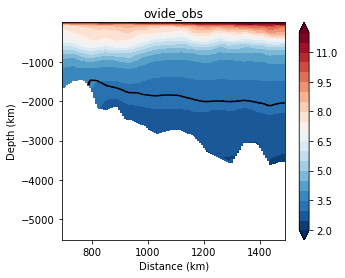

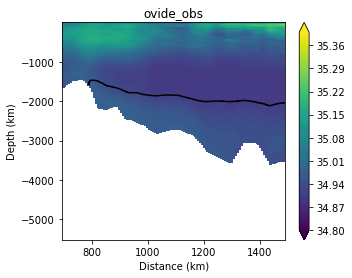

In [277]:
   
def main():
    
    warnings.filterwarnings("ignore")
    
    data_dir = '/data/users/smoreton/VALNA/DATA/'
    save_dir = '/home/h02/smoreton/Documents/VALNA/FIGURES/'
    obs_dir = '/data/users/smoreton/Obs/NA_overflows/'

    obs_name = 'ovide'
    #options: latrabjarg_clim, ovide, eel, kogur, hansen & osnap

    #only for osnap
    crop_to_Irmin_basin = False
    crop_to_Icel_basin = False

    # > 27.8 isotherm only
    isopyc_thres = 27.8

    levs_S, levs_T = set_T_S_plot_limits(obs_name)
    
    year = '1950' #after 30 yrs

    make_obs_T_plot(data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
    make_obs_S_plot(data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

#     make_model_T_plot('ak108', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('ak108', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

#     make_model_T_plot('ai758', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('ai758', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

#     make_model_T_plot('aj393', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('aj393', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

    
#     year = '2004' #after 30 yrs

#     make_model_T_plot('ar435', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('ar435', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

#     make_model_T_plot('ah494', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('ah494', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

#     make_model_T_plot('aq915', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)
#     make_model_S_plot('aq915', data_dir, obs_name, save_dir, year, levs_S, levs_T, crop_to_Irmin_basin, crop_to_Icel_basin)

    
if __name__=="__main__":
    main()
    